In [1]:
#%matplotlib nbagg
import os
import broadbean as bb
import numpy as np
import pandas as pd
import panel as pn
import tempfile
import qcodes as qc
import matplotlib.pyplot as plt
from sequencebuilder.alazar_config import alazarconfig
from sequencebuilder.refrenceinstrument import AlazarInstrument
from broadbean.plotting import plotter
from qcodes.utils.dataset.doNd import do0d
from sequencebuilder.spinbuilder import AWGController
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
from sequencebuilder.spinbuilder import SpinBuilder
pn.extension('tabulator')
ramp = bb.PulseAtoms.ramp

In [2]:
db_path = os.path.join(tempfile.gettempdir(),
                       'data_access_example.db')
initialise_or_create_database_at(db_path)

experiment = load_or_create_experiment(
    experiment_name='alazar',
    sample_name='alazar-sample')
SC = qc.Station(config_file="C:\\Users\\Farzad\\Documents\\Rasmus\\QCoDeS-experiment\\ConfigRBC.yaml")
AWGA = SC.load_instrument('AWGA')
seqbuild = AWGController(name = 'seqbuild', awg=AWGA)
SC.add_component(seqbuild)

Connected to: TEKTRONIX AWG5014C (serial:B051370, firmware:SCPI:99.0 FW:4.6.0.7) in 0.19s


'seqbuild'

In [3]:
alazar = SC.load_instrument('alazar')
alazarconfig(alazar, seqmode=True,external_clock=False)
alazar_ctrl = SC.load_instrument('alazar_ctrl')
channelA_oneD = SC.load_instrument('channelA_oneD',parent=alazar_ctrl)
alazar_ctrl.channels.append(channelA_oneD)


In [4]:
seqbuild.spinfunnel()


In [5]:
df_widget = pn.widgets.Tabulator(seqbuild.df)
df_widget

Tabulator(value=       name  time  type   ...)

I was here
I was here


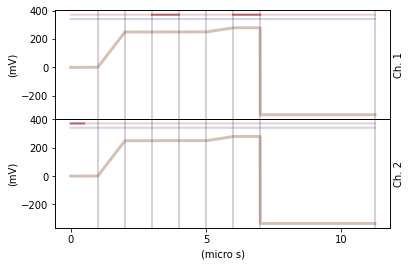

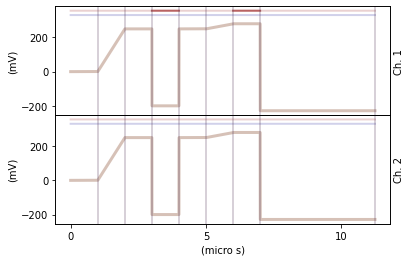

In [7]:
seqbuild.seq_from_df()
seqbuild.seq.plot_elem_nr(1)
seqbuild.seq.plot_elem_nr(100)

In [8]:
seqbuild.uploadToAWG()

Sequence uploaded in 4.325967311859131 seconds


In [9]:
seqbuild.awg.ch1_state(1)
seqbuild.awg.ch2_state(1)

In [10]:
print(seqbuild.awg.ch1_state())
print(seqbuild.awg.ch2_state())


1
1


In [11]:
seqbuild.awg.run()

'Running'

In [12]:
seqbuild.awg.get_state()

'Running'

In [13]:
#seqbuild.awg.delete_all_waveforms_from_list()

In [14]:
#seqbuild.awg.device_clear()

In [15]:
alazar_ctrl.int_time(0.9e-6)
alazar_ctrl.int_delay(1e-7)
channelA_oneD.num_averages(300)
channelA_oneD.records_per_buffer(200)
channelA_oneD.prepare_channel()

#channelA_oneD.data.get()

Starting experimental run with id: 31. 


(results #31@C:\Users\Farzad\AppData\Local\Temp\data_access_example.db
 ---------------------------------------------------------------------
 alazar_ctrl_channelA_oneD_records - array
 alazar_ctrl_channelA_oneD_data - array,
 [<AxesSubplot:title={'center':'Run #31, Experiment alazar (alazar-sample)'}, xlabel='Records', ylabel='mydata (mV)'>],
 [None])

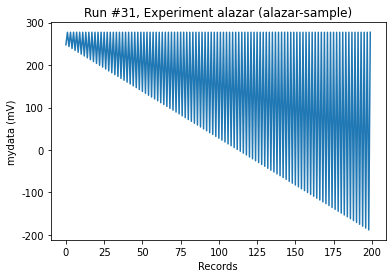

In [16]:
do0d(channelA_oneD.data, do_plot=True)

In [17]:
testbla = AlazarInstrument('bla',channelA_oneD.data.get,100)

In [18]:
#testbla.n_points.set(100)
#testbla.V_axis.reset()

Starting experimental run with id: 32. 


(results #32@C:\Users\Farzad\AppData\Local\Temp\data_access_example.db
 ---------------------------------------------------------------------
 bla_V_axis - array
 bla_datarefrence - array,
 [<AxesSubplot:title={'center':'Run #32, Experiment alazar (alazar-sample)'}, xlabel='V Axis (mV)', ylabel='V (mV)'>],
 [None])

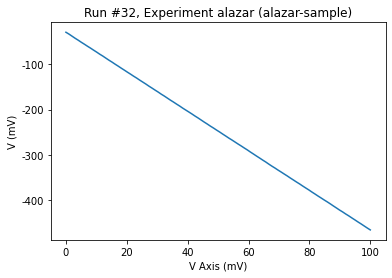

In [19]:
do0d(testbla.datarefrence, do_plot=True)